In [1]:
import pandas as pd
from pandas.io.json import json_normalize
import dask.dataframe as dd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
specs = pd.read_csv("C:/Users/namel/PyProj/specs.csv")
train_labels = pd.read_csv("C:/Users/namel/PyProj/train_labels.csv")
test = pd.read_csv("C:/Users/namel/PyProj/test.csv")

In [3]:
train = pd.read_csv("C:/Users/namel/PyProj/train.csv")
train.sample(5)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
1684197,e9c52111,6c29a34b8ef3bfec,2019-10-03T18:39:36.184Z,"{""jar"":[{""color"":""yellow"",""amount"":1},{""color""...",26998071,72,2030,95932,Bottle Filler (Activity),Activity,MAGMAPEAK
1512649,74e5f8a7,b280c543daeae2a5,2019-08-21T19:09:02.848Z,"{""shell_size"":3,""position"":2,""correct"":true,""h...",224d2fa0,43,4020,81785,Dino Drink,Game,MAGMAPEAK
2396032,0a08139c,ac105be5af6cfc91,2019-09-19T20:51:27.030Z,"{""description"":""Four!"",""identifier"":""sid_4"",""m...",353622fd,250,3010,145621,Bug Measurer (Activity),Activity,TREETOPCITY
839553,6c517a88,3b83e40cf7afab18,2019-09-25T14:22:45.845Z,"{""coordinates"":{""x"":441,""y"":283,""stage_width"":...",131eaf9c,9,4070,15262,Dino Drink,Game,MAGMAPEAK
6422364,6c517a88,00e251400f41c938,2019-09-04T16:50:17.901Z,"{""coordinates"":{""x"":329,""y"":70,""stage_width"":1...",8e875000,88,4070,211867,Dino Drink,Game,MAGMAPEAK


In [4]:
train_labels.sample(5)

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
14956,65cdf7d6d484db66,d510fc94,Cart Balancer (Assessment),1,2,0.333333,1
7665,b5f2b16873124e7c,685922d9,Mushroom Sorter (Assessment),1,1,0.500000,2
10403,d1d429ab0e280b86,911d567e,Bird Measurer (Assessment),0,4,0.000000,0
3020,92fae14bb6ae0d75,28433ead,Cauldron Filler (Assessment),1,0,1.000000,3
4803,5faf61d2ec3bdcdb,406ebb06,Bird Measurer (Assessment),1,2,0.333333,1


In [5]:
train=train.drop(columns=['event_data'])#event_data has already been expanded in other columns
train=train.dropna()
train=train.drop_duplicates()

In [6]:
train=train[train.game_time>0] #keep valid positive game_time intries
train.describe(include="all")

,event_id,game_session,timestamp,installation_id,event_count,event_code,game_time,title,type,world
count,11017890,11017890,11017890,11017890,1.101789e+07,1.101789e+07,1.101789e+07,11017890,11017890,11017890
unique,359,116958,10455549,12124,NaN,NaN,NaN,24,3,3
top,1325467d,6e6e697f2e593de1,2019-08-01T20:08:13.052Z,f1c21eda,NaN,NaN,NaN,Chow Time,Game,MAGMAPEAK
freq,274673,3367,11,57552,NaN,NaN,NaN,1140776,5742891,4934689
mean,NaN,NaN,NaN,NaN,1.087317e+02,3.556931e+03,2.034198e+05,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.494064e+02,6.417497e+02,1.829910e+06,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,2.000000e+00,2.010000e+03,4.000000e+00,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2.800000e+01,3.110000e+03,3.357200e+04,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.300000e+01,4.020000e+03,7.595900e+04,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,1.320000e+02,4.035000e+03,1.615140e+05,NaN,NaN,NaN


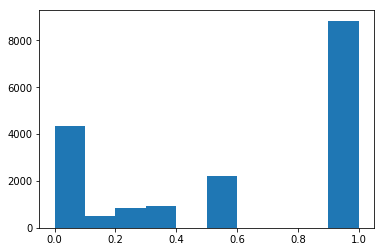

In [7]:
plt.hist(train_labels.accuracy)
plt.show()

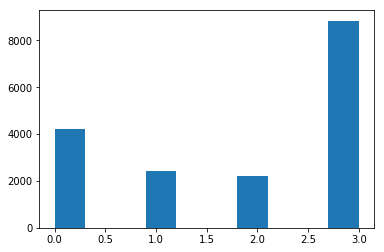

In [8]:
plt.hist(train_labels.accuracy_group)
plt.show()#3 is success in his/her first trial=best
          #0 is never suceeded=worst  

In [9]:
train_all=dd.merge(train,train_labels,how="inner",on=["installation_id","game_session"])
train_all.describe(include='all')
#NOT SURE IF IT'S RIGHT KEY TO MERGE ON!

,event_id,game_session,timestamp,installation_id,event_count,event_code,game_time,title_x,type,world,title_y,num_correct,num_incorrect,accuracy,accuracy_group
count,838948,838948,838948,838948,838948.000000,838948.000000,8.389480e+05,838948,838948,838948,838948,838948.000000,838948.000000,838948.000000,838948.000000
unique,92,17690,815970,3614,NaN,NaN,NaN,5,1,3,5,NaN,NaN,NaN,NaN
top,a8efe47b,a229f001486f628c,2019-09-01T05:09:45.351Z,08987c08,NaN,NaN,NaN,Bird Measurer (Assessment),Assessment,TREETOPCITY,Bird Measurer (Assessment),NaN,NaN,NaN,NaN
freq,45693,1273,4,7175,NaN,NaN,NaN,176526,838948,352755,176526,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,39.064681,3638.388327,6.415373e+04,NaN,NaN,NaN,NaN,0.704033,3.150356,0.461688,1.525613
std,NaN,NaN,NaN,NaN,50.524072,610.368284,9.750890e+05,NaN,NaN,NaN,NaN,0.456477,5.948613,0.423382,1.239510
min,NaN,NaN,NaN,NaN,2.000000,2010.000000,4.000000e+00,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,14.000000,3110.000000,1.114900e+04,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,27.000000,4025.000000,2.376300e+04,NaN,NaN,NaN,NaN,1.000000,1.000000,0.333333,1.000000
75%,NaN,NaN,NaN,NaN,47.000000,4040.000000,4.590700e+04,NaN,NaN,NaN,NaN,1.000000,4.000000,1.000000,3.000000


In [10]:
len(train_all.installation_id.unique())

3614

In [11]:
len(train.installation_id.unique())
#exists id in train but doesn't exist in train_labels
#semi-supervised?

12124

In [12]:
#look into specific installation_id/child:fa14af61

In [13]:
example=train_all[train_all.installation_id=='fa14af61']

In [14]:
example.describe(include="all")

,event_id,game_session,timestamp,installation_id,event_count,event_code,game_time,title_x,type,world,title_y,num_correct,num_incorrect,accuracy,accuracy_group
count,994,994,994,994,994.000000,994.000000,994.000000,994,994,994,994,994.000000,994.000000,994.000000,994.000000
unique,74,14,958,1,NaN,NaN,NaN,5,1,3,5,NaN,NaN,NaN,NaN
top,a16a373e,b2f2e69ec0d96687,2019-08-22T23:25:13.243Z,fa14af61,NaN,NaN,NaN,Bird Measurer (Assessment),Assessment,TREETOPCITY,Bird Measurer (Assessment),NaN,NaN,NaN,NaN
freq,127,220,3,994,NaN,NaN,NaN,468,994,642,468,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,58.079477,3720.772636,80765.905433,NaN,NaN,NaN,NaN,0.871227,2.460765,0.333870,1.124748
std,NaN,NaN,NaN,NaN,50.793787,560.448348,134013.202501,NaN,NaN,NaN,NaN,0.335117,1.297984,0.257604,0.761968
min,NaN,NaN,NaN,NaN,2.000000,2010.000000,76.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,20.000000,3120.000000,20091.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.250000,1.000000
50%,NaN,NaN,NaN,NaN,41.000000,4030.000000,34851.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.333333,1.000000
75%,NaN,NaN,NaN,NaN,80.000000,4070.000000,73323.750000,NaN,NaN,NaN,NaN,1.000000,3.000000,0.333333,1.000000


In [15]:
def timeConverter(x):
    year=int(x[0:4])
    month=int(x[5:7])
    day=int(x[8:10])
    hour=int(x[11:13])
    minute=int(x[14:16])
    second=int(x[17:19])
    msecond=int(x[20:23])*1000
    return datetime.datetime(year,month,day,hour,minute,second,msecond).timestamp()

In [16]:
example.timestamp[822078]

'2019-08-13T02:18:38.315Z'

In [17]:
timeConverter(example.timestamp[822078])

1565680718.315

In [18]:
ts=[]
for i in example.index:
    ts.append(timeConverter(example.timestamp[i]))

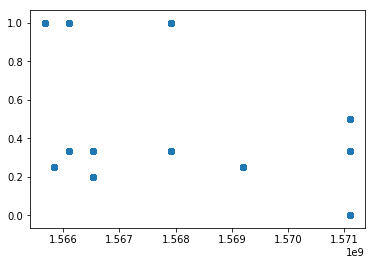

In [19]:
plt.scatter(ts,example.accuracy)
plt.show()#this champ makes little progress in assessment